In [1]:
import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('/Users/akanshajajodia/Desktop/projectdata/listings 2.csv')
inputDF=inputDF[['id','instant_bookable','room_type','host_since','accommodates','bathrooms','bedrooms','beds','amenities','cancellation_policy','review_scores_rating','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]

for i,r in inputDF.iterrows():
    inputDF.set_value(i,'year',r['host_since'][:4])
    inputDF.set_value(i,'month',r['host_since'][5:7])
    inputDF.set_value(i,'day',r['host_since'][8:])
inputDF.head()

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,id,instant_bookable,room_type,host_since,accommodates,bathrooms,bedrooms,beds,amenities,cancellation_policy,review_scores_rating,price,year,month,day
0,958,t,Entire home/apt,2008-07-31,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",moderate,97.0,170.0,2008,07,31
1,5858,f,Entire home/apt,2009-03-02,5,1.0,2.0,3.0,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",strict_14_with_grace_period,98.0,235.0,2009,03,02
2,7918,f,Private room,2009-06-17,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",strict_14_with_grace_period,84.0,65.0,2009,06,17
3,8142,f,Private room,2009-06-17,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",strict_14_with_grace_period,93.0,65.0,2009,06,17
4,8339,f,Entire home/apt,2009-07-02,4,1.5,2.0,2.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",moderate,97.0,703.0,2009,07,02


Text(0, 0.5, 'number of hosts')

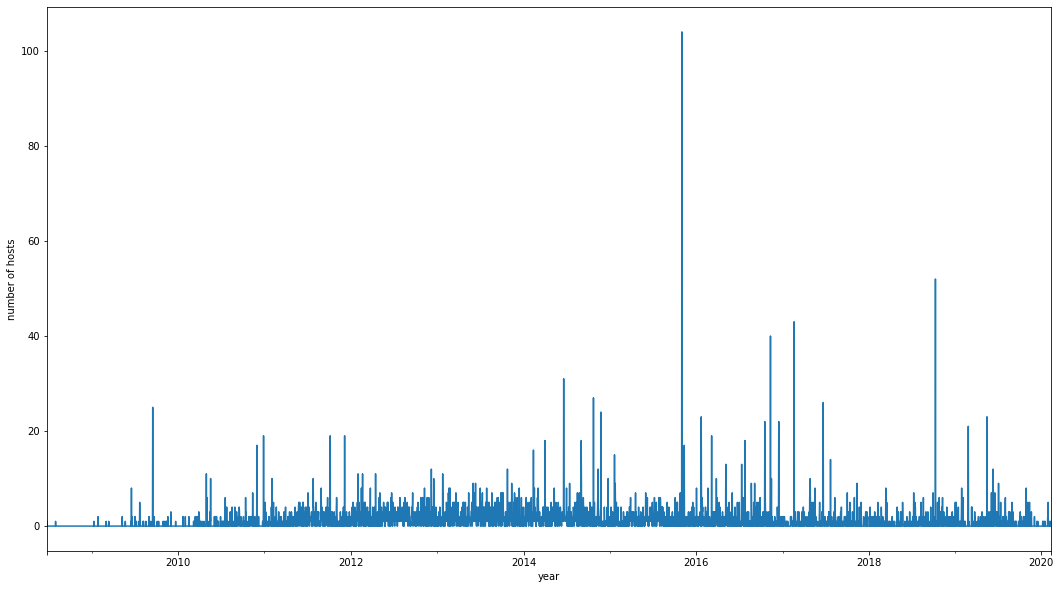

In [2]:

# this graph shows count of host registered everyday by resampling the data for each day

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
join_dates = pd.to_datetime(inputDF['host_since']).value_counts().resample('D').mean().fillna(0)
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')

Text(0, 0.5, 'Number of hosts')

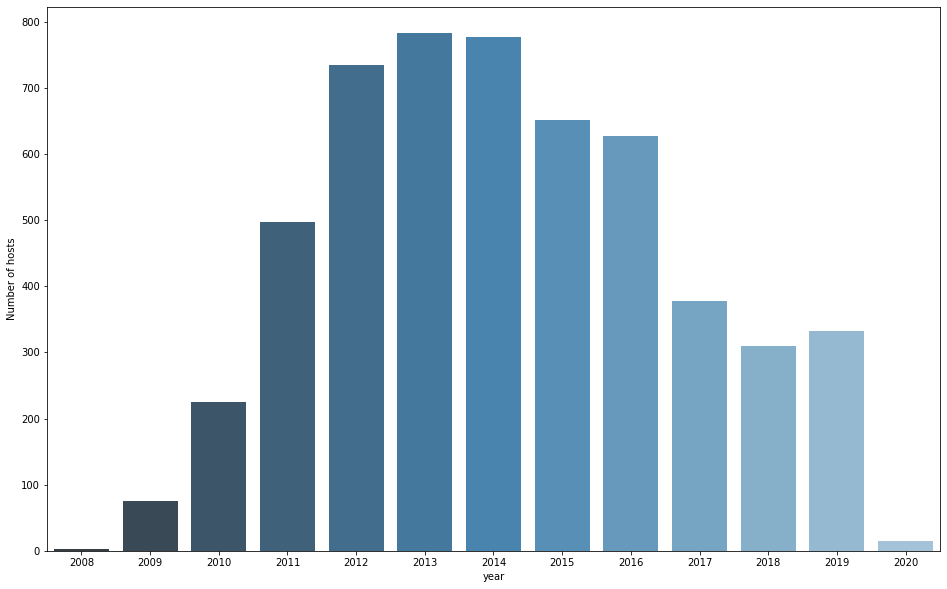

In [3]:
plt.figure(figsize=(16,10))
yearDF=inputDF.groupby(['year']).id.count()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'id':'Number of hosts'})
ax = sns.barplot(x='year', y="Number of hosts", data=yearDF,palette="Blues_d")
plt.ylabel('Number of hosts')

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


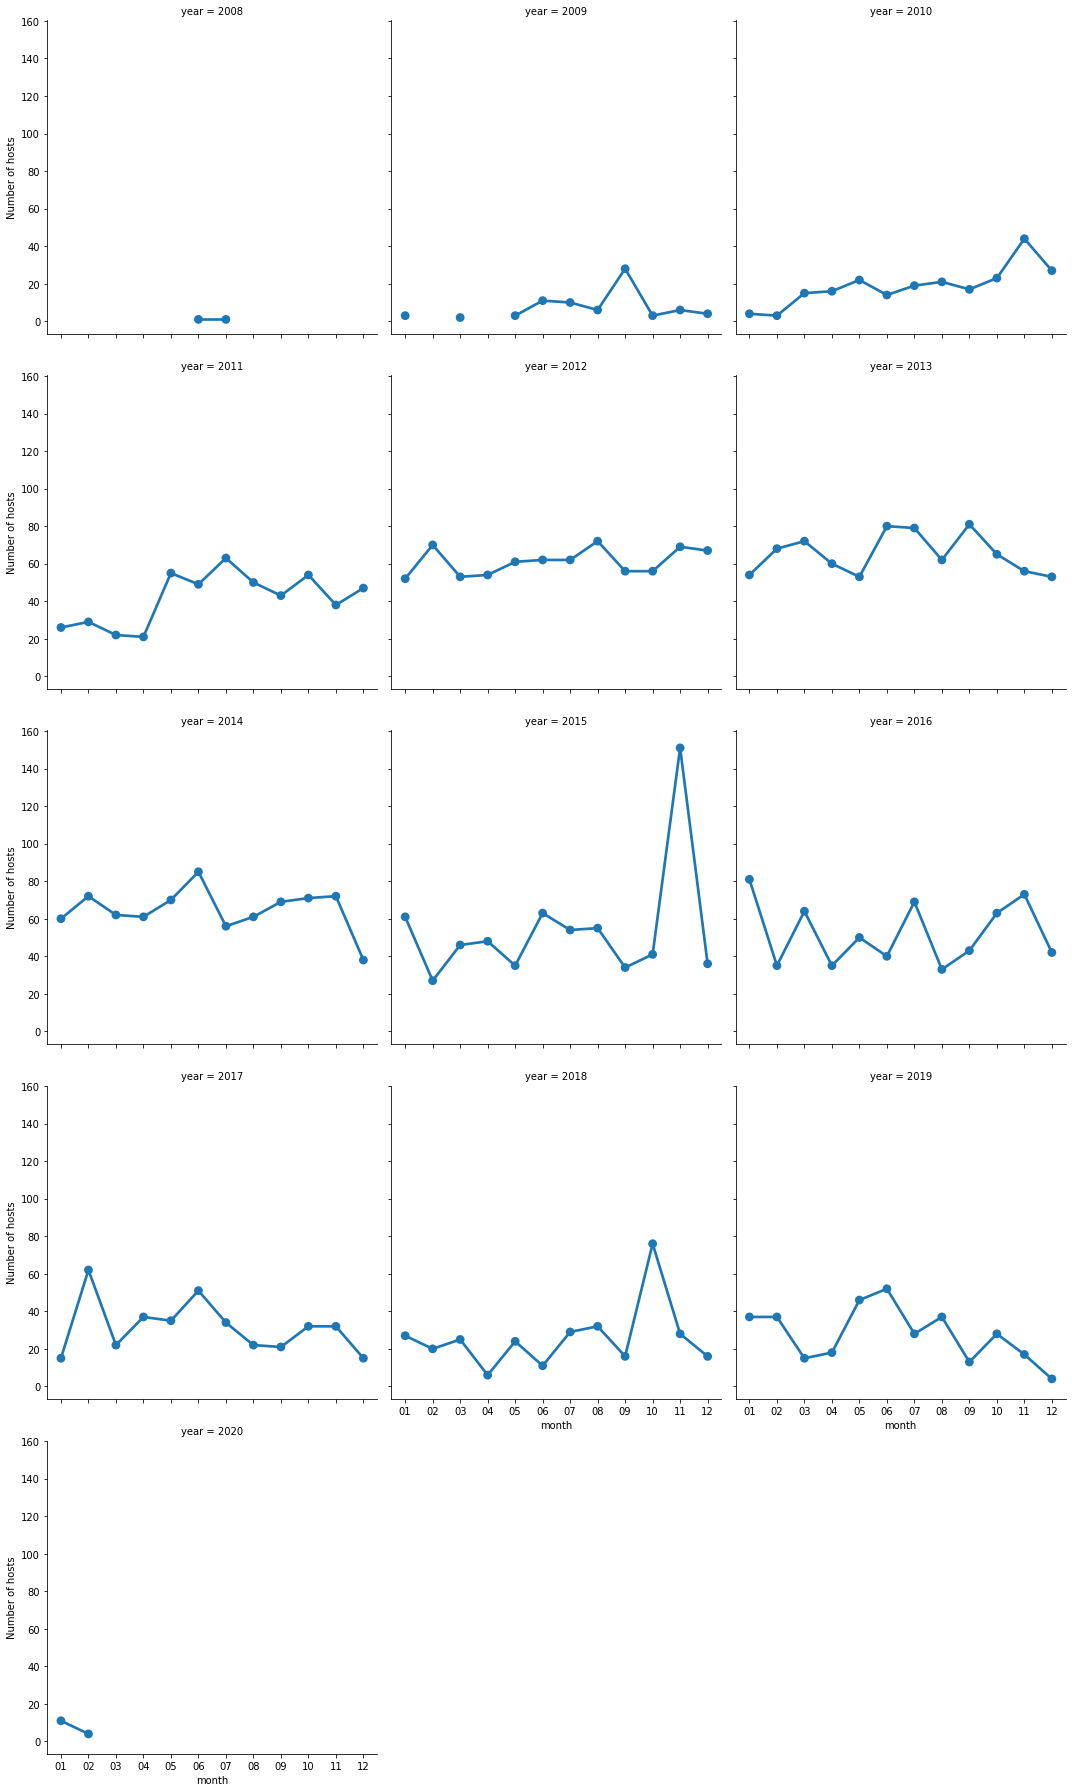

In [4]:
import seaborn as sns

yearMonth=inputDF.groupby(['year','month']).id.count()
yearMonth=yearMonth.reset_index()
yearMonth=yearMonth.sort_values(['year','month'],ascending=[1,1])
yearMonth=yearMonth.rename(columns={"id":"Number of hosts"})
sns.factorplot(data=yearMonth, x="month", y="Number of hosts",col="year",col_wrap=3)

Text(0, 0.5, 'Number of hosts')

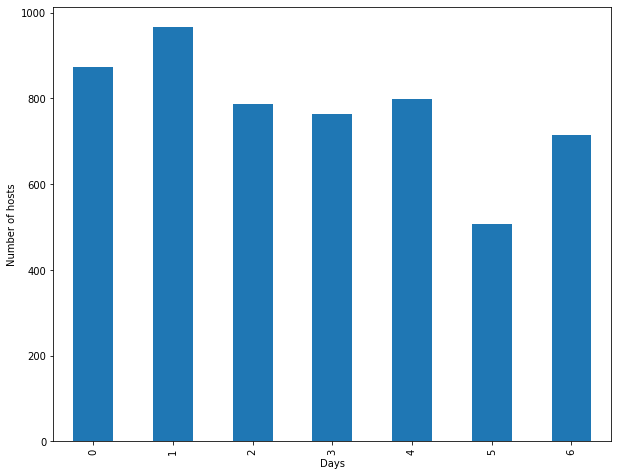

In [5]:
plt.figure(figsize=(10,8))
pd.to_datetime(inputDF['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts")

In [6]:
#this will create 4 columns namely flexible, moderate, strict, super_strict_30 which are its categories

cancel_policy = pd.get_dummies(inputDF.cancellation_policy).astype(int)
cancel_policy.head()

,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0


In [7]:
# Similiarly converting remaining categorial column,instant_booking  into indiactor variables

instant_booking = pd.get_dummies(inputDF.instant_bookable, prefix = 'instant_booking').astype(int)
instant_booking.head()

,instant_booking_f,instant_booking_t
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:

room_type = pd.get_dummies(inputDF.room_type).astype(int)
room_type.head()

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0


In [9]:
# drop original columns and replace them with indicator columns

inputDF = inputDF.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
inputDF = pd.concat((inputDF, cancel_policy, instant_booking, room_type), axis = 1)

inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,year,...,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Hotel room,Private room,Shared room
0,958,2008-07-31,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",97.0,170.0,2008,...,0,0,0,0,0,1,1,0,0,0
1,5858,2009-03-02,5,1.0,2.0,3.0,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",98.0,235.0,2009,...,0,1,0,0,1,0,1,0,0,0
2,7918,2009-06-17,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",84.0,65.0,2009,...,0,1,0,0,1,0,0,0,1,0
3,8142,2009-06-17,2,4.0,1.0,1.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",93.0,65.0,2009,...,0,1,0,0,1,0,0,0,1,0
4,8339,2009-07-02,4,1.5,2.0,2.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",97.0,703.0,2009,...,0,0,0,0,1,0,1,0,0,0


In [10]:
# splitting the amenities list to count the number of amenities
amenities_list = []

for element in inputDF.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

inputDF.amenities = amenities_list
inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,year,...,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_f,instant_booking_t,Entire home/apt,Hotel room,Private room,Shared room
0,958,2008-07-31,3,1.0,1.0,2.0,31,97.0,170.0,2008,...,0,0,0,0,0,1,1,0,0,0
1,5858,2009-03-02,5,1.0,2.0,3.0,10,98.0,235.0,2009,...,0,1,0,0,1,0,1,0,0,0
2,7918,2009-06-17,2,4.0,1.0,1.0,18,84.0,65.0,2009,...,0,1,0,0,1,0,0,0,1,0
3,8142,2009-06-17,2,4.0,1.0,1.0,15,93.0,65.0,2009,...,0,1,0,0,1,0,0,0,1,0
4,8339,2009-07-02,4,1.5,2.0,2.0,26,97.0,703.0,2009,...,0,0,0,0,1,0,1,0,0,0


In [61]:
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV, cross_validate, train_test_split
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn import ensemble

split_data= inputDF.drop(['price'],axis=1)
train1,test1,train2,test2=train_test_split(split_data,inputDF.price, test_size=0.3,train_size = 0.7,random_state=13)



In [62]:
# Lets analyze if linear regression can predict the prices accurately
# mean of prices
mean = np.mean(inputDF.price)

# standard deviation to compare 
std = np.std(inputDF.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

mean: 232.38720414201183
standard deviation: 466.93864328905215


In [35]:
print (train1.dtypes)

id                               int64
host_since                      object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
amenities                        int64
review_scores_rating           float64
year                            object
month                           object
day                             object
flexible                         int64
moderate                         int64
strict                           int64
strict_14_with_grace_period      int64
super_strict_30                  int64
super_strict_60                  int64
instant_booking_f                int64
instant_booking_t                int64
Entire home/apt                  int64
Hotel room                       int64
Private room                     int64
Shared room                      int64
dtype: object


In [64]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train1, train2)


ValueError: could not convert string to float: '2014-04-02'

In [65]:
train1 = train1.apply(pd.to_numeric, errors='coerce')
train1.fillna(0, inplace=True)
test1 = train1.apply(pd.to_numeric, errors='coerce')
test1.fillna(0, inplace=True)


In [67]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train1, train2)
linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(test1))
print ("Linear Regression: " + str(linear_reg_error))

ValueError: Found input variables with inconsistent numbers of samples: [1623, 3785]

In [49]:
test1.shape

(3244, 23)

In [51]:
train1.shape

(3244, 23)

In [52]:
test2.shape

(2164,)

In [54]:
train2.shape

(3244,)

In [55]:
train2

4241    300.0
3328    140.0
1815    138.0
1200    110.0
4036    195.0
        ...  
174      99.0
991     200.0
3263     60.0
86       30.0
379     210.0
Name: price, Length: 3244, dtype: float64

In [56]:
test2

2086    300.0
4725    365.0
265     190.0
1151    123.0
6363     76.0
        ...  
551     120.0
4492    125.0
1119     91.0
7086     66.0
1300     65.0
Name: price, Length: 2164, dtype: float64